In [14]:
import igraph as ig
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('facebook_combined.txt',sep=' ',names = ['a','b']) 
tuples = [tuple(x) for x in df.values]

G = ig.Graph.TupleList(tuples)

In [8]:
K_shell = G.shell_index()

In [10]:
Deg = G.degree()

Text(0, 0.5, 'Degree')

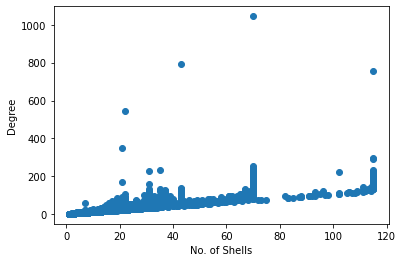

In [48]:
plt.scatter(K_shell,Deg)
plt.xlabel('No. of Shells')
plt.ylabel('Degree')

In [52]:
s = []
for x in G.vs.indices:
    if K_shell[x] == max(K_shell):
        s.append(x)
print(s)

[352, 1490, 2145, 2154, 2167, 2224, 2944, 2945, 2954, 2962, 2964, 2966, 2976, 2980, 2984, 2989, 2993, 2994, 2995, 2996, 3002, 3004, 3007, 3018, 3024, 3025, 3029, 3030, 3032, 3034, 3044, 3047, 3048, 3051, 3053, 3054, 3058, 3062, 3065, 3066, 3068, 3071, 3073, 3079, 3080, 3084, 3085, 3087, 3090, 3091, 3094, 3095, 3096, 3097, 3101, 3103, 3104, 3106, 3110, 3112, 3125, 3133, 3135, 3136, 3141, 3142, 3146, 3152, 3155, 3157, 3159, 3165, 3169, 3175, 3178, 3184, 3187, 3197, 3200, 3201, 3203, 3209, 3213, 3220, 3221, 3222, 3234, 3235, 3236, 3238, 3241, 3242, 3247, 3250, 3252, 3253, 3256, 3260, 3264, 3265, 3268, 3270, 3273, 3276, 3283, 3290, 3294, 3295, 3296, 3299, 3305, 3310, 3312, 3315, 3326, 3336, 3338, 3340, 3341, 3351, 3354, 3360, 3362, 3365, 3367, 3370, 3376, 3377, 3382, 3391, 3395, 3397, 3398, 3399, 3401, 3406, 3407, 3408, 3411, 3418, 3423, 3429, 3431, 3433, 3437, 3438, 3439, 3441, 3443, 3445, 3449, 3451, 3456, 3457, 3461, 3467, 3477, 3478]


In [55]:
d = []
for x in G.vs.indices:
    if Deg[x] == max(Deg):
        d.append(x)
print(d,Deg[d[0]])

[107] 1045


# Degree based approach

In [44]:
import igraph as ig
import pandas as pd

df = pd.read_csv('facebook_combined.txt',sep=' ',names = ['a','b']) 

tuples = [tuple(x) for x in df.values]
G = ig.Graph.TupleList(tuples)
D = G.degree()  #degree of nodes
current = 11
target = 352
path = []
path.append(current)
while (current != target): 
    neighbor = G.neighbors(current)
    ns = [x for x in neighbor if x not in path]
    y=[]
    for x in range(0,len(ns)): #finds nighbor's degree
        y.append(D[ns[x]])
    if y==[]:   #if node has no unvisted neighbors it breaks
        break
    i= y.index(max(y))  #finds the node with highest degree
    current= ns[i]     
    path.append(current)

In [45]:
print(len(path))
print(path)

237
[11, 0, 107, 351, 2403, 2871, 2326, 2925, 2630, 2521, 2501, 2756, 2440, 2355, 2537, 2619, 2351, 2251, 2892, 2513, 2570, 2259, 2465, 2486, 2273, 2427, 2188, 2806, 2315, 2622, 2902, 2832, 2797, 2933, 2652, 2594, 2508, 2293, 2296, 2243, 2362, 2841, 2347, 2236, 2578, 2685, 2689, 2305, 2551, 2617, 2687, 2581, 2725, 2773, 2668, 2861, 2398, 2860, 2413, 2713, 2393, 2602, 2857, 2461, 2592, 2854, 2321, 2869, 2526, 2901, 2703, 2543, 2785, 2463, 2113, 2656, 2795, 2675, 2256, 2099, 2497, 2123, 2649, 2103, 2096, 2107, 2816, 2833, 2852, 2763, 2769, 2845, 2350, 2710, 2563, 2680, 2496, 2842, 2643, 2855, 2469, 2517, 2550, 2474, 2917, 2327, 2451, 2577, 2475, 2487, 2323, 2836, 2246, 2858, 2258, 2329, 2312, 2641, 2263, 2500, 2346, 2597, 2431, 2369, 2484, 2566, 2750, 2430, 2599, 2435, 2468, 2428, 2636, 2392, 2472, 2464, 2624, 2870, 2704, 2436, 2849, 2523, 2479, 2478, 2801, 2722, 2426, 2655, 2277, 2470, 2284, 2269, 2932, 2545, 2684, 2637, 2443, 2605, 2498, 2539, 2304, 2614, 2808, 2379, 2334, 2471, 2248, 

In [12]:
for x in path:   #plotting the final path
    G.vs[x]['color'] = 'blue'
ig.plot(G, vertex_label=list(G.vs.indices)).show()

# SH approach

In [38]:
import igraph as ig
import random
import pandas as pd

df = pd.read_csv('facebook_combined.txt',sep=' ',names = ['a','b']) 

tuples = [tuple(x) for x in df.values]
G = ig.Graph.TupleList(tuples)

K_shell = G.shell_index()
Deg = G.degree()

current = 11
target = 352

path = []
path.append(current)

while (current != target):
    next_nodes = G.neighbors(current)
    req = [x for x in next_nodes if x not in path]
    y = [K_shell[x] for x in req]
    i= y.index(max(y))
    v = req[i]
    current_shell = K_shell[current]
    if (K_shell[v] <= current_shell):
        rand = random.choice(req)
        current = rand
        path.append(current)
    else:
        current = v
        path.append(current)

In [39]:
print(len(path))
print(path)

6
[11, 0, 107, 595, 350, 352]


# SA approach with only argmax

In [34]:
import igraph as ig
import random
import pandas as pd

df = pd.read_csv('facebook_combined.txt',sep=' ',names = ['a','b']) 

tuples = [tuple(x) for x in df.values]
G = ig.Graph.TupleList(tuples)

K_shell = G.shell_index()
Deg = G.degree()

current = 11
target = 352

path = []
path.append(current)

while (current != target):
    next_nodes = G.neighbors(current)
    req = [x for x in next_nodes if x not in path]
    y = [K_shell[x] for x in req]
    if y == []:
        print('Target No Reached')
        break
    i= y.index(max(y))
    v = req[i]
    current_shell = K_shell[current]
    if (K_shell[v] <= current_shell):
        y = [Deg[x] for x in req]
        i = y.index(max(y))
        current = req[i]
        path.append(current)
    else:
        current = req[i]
        path.append(current)

Target No Reached


In [35]:
print(len(path))
print(path)

165
[11, 0, 107, 351, 2403, 2871, 2326, 2925, 2630, 2521, 2501, 2756, 2440, 2355, 2537, 2619, 2351, 2251, 2892, 2513, 2570, 2259, 2465, 2486, 2273, 2427, 2188, 2806, 2315, 2622, 2902, 2832, 2099, 2797, 2933, 2652, 2594, 2236, 2296, 2243, 2362, 2293, 2393, 2347, 2841, 2508, 2656, 2689, 2398, 2578, 2685, 2581, 2413, 2617, 2668, 2773, 2725, 2611, 2687, 2861, 2713, 2256, 2860, 2542, 2602, 2526, 2592, 2461, 2497, 2854, 2321, 2653, 2269, 2550, 2517, 2327, 2917, 2474, 2451, 2577, 2475, 2487, 2323, 2836, 2246, 2858, 2258, 2329, 2312, 2428, 2346, 2469, 2597, 2500, 2369, 2431, 2566, 2484, 2750, 2430, 2599, 2435, 2468, 2641, 2277, 2636, 2263, 2426, 2471, 2472, 2392, 2464, 2624, 2248, 2704, 2870, 2443, 2479, 2523, 2849, 2436, 2470, 2722, 2801, 2478, 2684, 2545, 2536, 2498, 2284, 2527, 2645, 2637, 2655, 2457, 2605, 2382, 2343, 2583, 2677, 2539, 2932, 2606, 2712, 2334, 2260, 2322, 2590, 2544, 2304, 2379, 2614, 2808, 2314, 2502, 2745, 2573, 2569, 2693, 2316, 2456, 2490, 2625, 2294, 2771]


# Inter shell hill climbing with Intra degree (Random)

In [26]:
import igraph as ig
import random
import pandas as pd

df = pd.read_csv('facebook_combined.txt',sep=' ',names = ['a','b']) 

tuples = [tuple(x) for x in df.values]
G = ig.Graph.TupleList(tuples)

K_shell = G.shell_index()
Deg = G.degree()

current = 11
target = 352

path = []
path.append(current)

while (current != target):
    next_nodes = G.neighbors(current)
    req = [x for x in next_nodes if x not in path]
    if req == []:
        print('Try again! Core not found')
        break
    max_shell = max([K_shell[x] for x in req])
    current_shell = K_shell[current]
    if (max_shell <= current_shell):
        max_degree = max([Deg[x] for x in req])
        rand = [x for x in req if Deg[x] == max_degree]
        current = random.choice(rand)
        path.append(current)
    else:
        rand = [x for x in req if K_shell[x] == max_shell]
        current = random.choice(rand)
        path.append(current)

In [31]:
print(len(path)),
print(path)

238
[11, 0, 107, 351, 2403, 2871, 2326, 2925, 2630, 2521, 2501, 2756, 2440, 2355, 2537, 2619, 2351, 2892, 2251, 2570, 2513, 2273, 2427, 2188, 2806, 2315, 2622, 2902, 2832, 2797, 2933, 2652, 2594, 2296, 2243, 2362, 2293, 2731, 2236, 2347, 2841, 2508, 2854, 2689, 2685, 2578, 2581, 2393, 2617, 2398, 2687, 2773, 2725, 2611, 2861, 2668, 2860, 2656, 2461, 2785, 2413, 2713, 2592, 2857, 2602, 2099, 2901, 2526, 2321, 2653, 2566, 2465, 2259, 2486, 2517, 2550, 2474, 2917, 2327, 2451, 2577, 2475, 2487, 2323, 2836, 2641, 2849, 2858, 2258, 2346, 2246, 2597, 2469, 2500, 2369, 2329, 2312, 2523, 2484, 2431, 2263, 2269, 2599, 2750, 2430, 2468, 2435, 2624, 2464, 2870, 2704, 2636, 2428, 2479, 2392, 2472, 2436, 2684, 2722, 2426, 2536, 2478, 2801, 2470, 2277, 2655, 2637, 2443, 2284, 2498, 2932, 2606, 2605, 2645, 2545, 2583, 2248, 2539, 2677, 2471, 2334, 2527, 2614, 2457, 2503, 2625, 2294, 2382, 2343, 2552, 2375, 2712, 2314, 2808, 2304, 2544, 2590, 2322, 2379, 2502, 2745, 2573, 2260, 2316, 2456, 2490, 2891, 